# Data Mining Project 1: Data Exploration and Visualization

#### MSDS 7331 - Section 403
#### Sabitri KC | Rob Rivens | Andrew Walch

### Abstract

####  We chose to analyze a data set containing Crypto Currency trading data for 1,337 "Cryptos".  We were interested in the data set due to the popularity of Crypto Currencies such as Bitcoin, Ripple, Bitcoin Cash and others.  Given the recent volatility in the market, we thought it would be interesting to analyze Open, High and Closing Prices, while trying to determine if there is a correlation between Price and relative rank of the currencies.   We will run a Principal Component Analysis to determine if we can reduce our variables.  We will measure the effectiveness of our algorithm by determining the percent of the variation explained by our Principal Components.  We will use a "train set" of data, using the Buy Flag as our target.

### Data Set Definitions

#### The data set variables are as follows: (1) slug = name of currency; (2) symbol = trading symbol; (3) name = common name of currency; (4) date = date of trading data; (5) ranknow = rank of currency; (6) open = opening price for the day; (7) high = highest price attained for the day; (8) low = lowest price attained for the day; (9) close = closing price for the day; (10) volume = total number of coins traded for the day; (11) market = ; (12) close_ratio = closing price / high price for the day; (13) spread = difference between open and closing price for the day; (14) Buy_Flag = variable added to determine if currency should be purchase or not

### Variable Characteristics

####  The data set contained 659,373 observations of 13 variables for 1,337 Crypto Tokens.  The data set characteristics are as follows: (1) Text fields: slug (used to normalize duplicates), symbol, name; (2) Date field: date;  (3) Integer Fields: ranknow, Buy_Flag; (4) US Dollar Numeric fields: open, high, low, close, market, spread; (5) Numeric field: volume; (6) Percentage Field: close_ratio.  The price variables reflect relative values of the Crypto Token at various points in the day and vary in range according to the value of the currency.  Since the ranges are vast, we will explore the values in our data exploration tasks.

### Data Quality

#### There were very few missing values, all related to the close_ratio.  We calculated our own close_ratio so that all Cryptos had a value.  The were no duplicate observations.

### Exploratory Analysis 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/Users/robertrivens/crypto-markets.csv",low_memory=False,parse_dates=True)  #read in the csv file

##### Check Data Frame to ensure data read-in properly

In [3]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,Buy_Flag
0,bitcoin,BTC,Bitcoin,4/28/13,1,135.300000,135.980000,132.100000,134.210000,0,1.500520e+09,0.5438,3.88,0
1,bitcoin,BTC,Bitcoin,4/29/13,1,134.440000,147.490000,134.000000,144.540000,0,1.491160e+09,0.7813,13.49,0
2,bitcoin,BTC,Bitcoin,4/30/13,1,144.000000,146.930000,134.050000,139.000000,0,1.597780e+09,0.3843,12.88,0
3,bitcoin,BTC,Bitcoin,5/1/13,1,139.000000,139.890000,107.720000,116.990000,0,1.542820e+09,0.2882,32.17,0
4,bitcoin,BTC,Bitcoin,5/2/13,1,116.380000,125.600000,92.280000,105.210000,0,1.292190e+09,0.3881,33.32,0
5,bitcoin,BTC,Bitcoin,5/3/13,1,106.250000,108.130000,79.100000,97.750000,0,1.180070e+09,0.6424,29.03,0
6,bitcoin,BTC,Bitcoin,5/4/13,1,98.100000,115.000000,92.500000,112.500000,0,1.089890e+09,0.8889,22.50,0
7,bitcoin,BTC,Bitcoin,5/5/13,1,112.900000,118.800000,107.140000,115.910000,0,1.254760e+09,0.7521,11.66,0
8,bitcoin,BTC,Bitcoin,5/6/13,1,115.980000,124.660000,106.640000,112.300000,0,1.289470e+09,0.3141,18.02,0
9,bitcoin,BTC,Bitcoin,5/7/13,1,112.250000,113.440000,97.700000,111.500000,0,1.248470e+09,0.8767,15.74,0


##### Check first 5 observations

In [4]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,Buy_Flag
0,bitcoin,BTC,Bitcoin,4/28/13,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.5438,3.88,0
1,bitcoin,BTC,Bitcoin,4/29/13,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.7813,13.49,0
2,bitcoin,BTC,Bitcoin,4/30/13,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.3843,12.88,0
3,bitcoin,BTC,Bitcoin,5/1/13,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.2882,32.17,0
4,bitcoin,BTC,Bitcoin,5/2/13,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.3881,33.32,0


#### We reviewed the summary of variables to take a look at the data columns, verifying that the number of observations were representative of the entire data set, how the data types were assigned upon importing the data, and whether any columns contained null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659373 entries, 0 to 659372
Data columns (total 14 columns):
slug           659373 non-null object
symbol         659373 non-null object
name           659373 non-null object
date           659373 non-null object
ranknow        659373 non-null int64
open           659373 non-null float64
high           659373 non-null float64
low            659373 non-null float64
close          659373 non-null float64
volume         659373 non-null int64
market         659373 non-null float64
close_ratio    644847 non-null object
spread         659373 non-null float64
Buy_Flag       659373 non-null int64
dtypes: float64(6), int64(3), object(5)
memory usage: 70.4+ MB


#### We decided to change the Close Ratio, as we were not satisfied with the original formula.  We wanted the calculation to calculate the close price as a function of the high price, in order to provide insight into the relative valuation of a Crypto at the highest point of the day, compared to the final closing price.  In this way, we could ascertain whether gains made during the day were sustained or eventually dwindled.  There is much discussion about the price of Cryptos being subject to manipulation, so this method seeks to normalize such interference.

In [6]:
df.close_ratio=df.close/df.high

##### Check Close Ratio variable

In [7]:
df.close_ratio.min(),df.close_ratio.max(), df.close_ratio.median()

(0.0, 1.0, 0.9301559162236391)

#### We wanted to check min, max and median, and standard deviation of Closing Currency Price, to get an idea of how much the data in our set varied.  The minimum value was 0, however the max was 2.3MM.  With a standard deviation of 9,297, we realized we had a data set containing vastly different valuations.

In [8]:
df.close.min(), df.close.max(), df.close.median(), df.close.std()

(0.0, 2300740.0, 0.0067, 9297.60086985845)

#####  Check other statistics

In [9]:
df.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,Buy_Flag
count,659373.000000,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,659373.000000,6.593730e+05,659373.000000
mean,664.808072,1.954633e+02,2.390818e+02,1.582942e+02,1.952336e+02,4.024155e+06,9.495151e+07,0.880615,8.078717e+01,0.993172
std,376.857132,9.339245e+03,1.215379e+04,7.104065e+03,9.297601e+03,1.419269e+08,2.653592e+09,0.144059,6.194455e+03,0.082347
min,1.000000,1.000000e-10,1.300000e-10,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,362.000000,4.130000e-04,4.830000e-04,3.550000e-04,4.140000e-04,2.000000e+01,6.706000e+03,0.835714,0.000000e+00,1.000000
50%,666.000000,6.680000e-03,7.732000e-03,5.828000e-03,6.700000e-03,3.400000e+02,7.521600e+04,0.930156,0.000000e+00,1.000000
75%,961.000000,9.682200e-02,1.119570e-01,8.445300e-02,9.728600e-02,7.618000e+03,9.043740e+05,0.981651,2.000000e-02,1.000000
max,1408.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261410e+11,1.000000,1.770563e+06,1.000000


#### Although we knew there were not duplicate observations, we wanted to understand if each obervation was unique to the extent that time series data should be (one observation for each token, for each day).  We decided to add a new boolean column that will identify a duplicated Symbol (False=Not a duplicate; True=Duplicate).  

In [11]:
df['is_duplicated'] = df.duplicated(['symbol'])

In [12]:
df['is_duplicated'].sum()

658004

#### Inspect dataset to determine if duplicates make sense

In [13]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,Buy_Flag,is_duplicated
0,bitcoin,BTC,Bitcoin,4/28/13,1,135.300000,135.980000,132.100000,134.210000,0,1.500520e+09,0.986983,3.88,0,False
1,bitcoin,BTC,Bitcoin,4/29/13,1,134.440000,147.490000,134.000000,144.540000,0,1.491160e+09,0.979999,13.49,0,True
2,bitcoin,BTC,Bitcoin,4/30/13,1,144.000000,146.930000,134.050000,139.000000,0,1.597780e+09,0.946029,12.88,0,True
3,bitcoin,BTC,Bitcoin,5/1/13,1,139.000000,139.890000,107.720000,116.990000,0,1.542820e+09,0.836300,32.17,0,True
4,bitcoin,BTC,Bitcoin,5/2/13,1,116.380000,125.600000,92.280000,105.210000,0,1.292190e+09,0.837659,33.32,0,True
5,bitcoin,BTC,Bitcoin,5/3/13,1,106.250000,108.130000,79.100000,97.750000,0,1.180070e+09,0.904004,29.03,0,True
6,bitcoin,BTC,Bitcoin,5/4/13,1,98.100000,115.000000,92.500000,112.500000,0,1.089890e+09,0.978261,22.50,0,True
7,bitcoin,BTC,Bitcoin,5/5/13,1,112.900000,118.800000,107.140000,115.910000,0,1.254760e+09,0.975673,11.66,0,True
8,bitcoin,BTC,Bitcoin,5/6/13,1,115.980000,124.660000,106.640000,112.300000,0,1.289470e+09,0.900850,18.02,0,True
9,bitcoin,BTC,Bitcoin,5/7/13,1,112.250000,113.440000,97.700000,111.500000,0,1.248470e+09,0.982898,15.74,0,True


#### We determined that some duplicates existed due to some tokens changing Symbols at some point over the course of the years analyzed.  Although there were duplicates in the symbol, the "slug" was created to represent one and only one instance of a token, so duplicates are okay.   

#### Due to the large amount of data, we decided to create a top 10 rank and only keep the observations falling within this range.

In [14]:
top10_rank = [1,2,3,4,5,6,7,8,9,10]

In [15]:
df = df[df['ranknow'].isin(top10_rank)]

#### We then reviewed the data frame to confirm our ranking was successful:

In [16]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,Buy_Flag,is_duplicated
0,bitcoin,BTC,Bitcoin,4/28/13,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.986983,3.88,0,False
1,bitcoin,BTC,Bitcoin,4/29/13,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.979999,13.49,0,True
2,bitcoin,BTC,Bitcoin,4/30/13,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.946029,12.88,0,True
3,bitcoin,BTC,Bitcoin,5/1/13,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.836300,32.17,0,True
4,bitcoin,BTC,Bitcoin,5/2/13,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.837659,33.32,0,True
5,bitcoin,BTC,Bitcoin,5/3/13,1,106.25,108.13,79.10,97.75,0,1.180070e+09,0.904004,29.03,0,True
6,bitcoin,BTC,Bitcoin,5/4/13,1,98.10,115.00,92.50,112.50,0,1.089890e+09,0.978261,22.50,0,True
7,bitcoin,BTC,Bitcoin,5/5/13,1,112.90,118.80,107.14,115.91,0,1.254760e+09,0.975673,11.66,0,True
8,bitcoin,BTC,Bitcoin,5/6/13,1,115.98,124.66,106.64,112.30,0,1.289470e+09,0.900850,18.02,0,True
9,bitcoin,BTC,Bitcoin,5/7/13,1,112.25,113.44,97.70,111.50,0,1.248470e+09,0.982898,15.74,0,True


#### Since Bitcoin is in no 1, we decided to depict the trend from 2013, graphically:

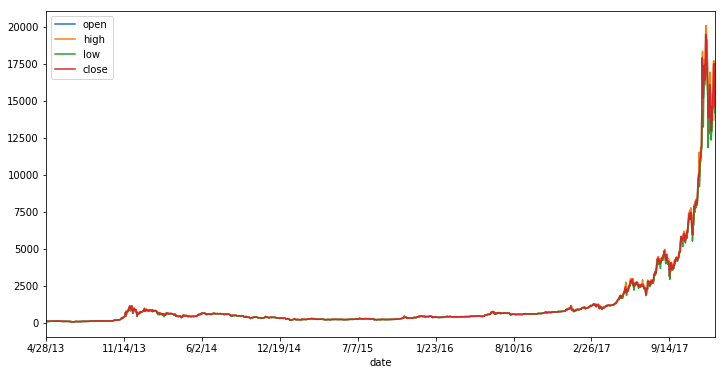

In [17]:
Bitcoin_price = df[df['name']=='Bitcoin']
Bitcoin_price.set_index(['date'],inplace=True)
Bitcoin_price[['open','high','low','close']].plot(figsize=(12,6))
plt.show()

#### Bitcoin started out with a closing price of 139.25 USD in 2013, but has most recently closed at 15,561.24 USD per coin -- that's a +6000% increase!  This means 9,000 USD invested in April of 2013 would be worth one million USD, today!

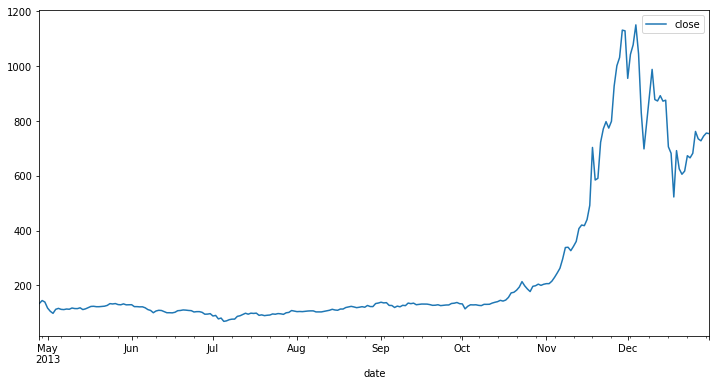

In [36]:
start_13 = pd.to_datetime('2013-01-01')
end_13 = pd.to_datetime('2014-01-01')
Bitcoin_price13 = df[df['name']=='Bitcoin']
Bitcoin_price13 = Bitcoin_price13[pd.to_datetime(Bitcoin_price13['date']) >= start_13] # getting greater than 2013
Bitcoin_price13= Bitcoin_price13[pd.to_datetime(Bitcoin_price13['date']) < end_13] # getting less than 2014
Bitcoin_price13.set_index(pd.to_datetime(Bitcoin_price13['date']),inplace=True)
Bitcoin_price13[['close']].plot(figsize=(12,6))
plt.show()

In [37]:
Bitcoin_price13

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,Buy_Flag,is_duplicated
date,,,,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,4/28/13,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.986983,3.88,0,False
2013-04-29,bitcoin,BTC,Bitcoin,4/29/13,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.979999,13.49,0,True
2013-04-30,bitcoin,BTC,Bitcoin,4/30/13,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.946029,12.88,0,True
2013-05-01,bitcoin,BTC,Bitcoin,5/1/13,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.836300,32.17,0,True
2013-05-02,bitcoin,BTC,Bitcoin,5/2/13,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.837659,33.32,0,True
2013-05-03,bitcoin,BTC,Bitcoin,5/3/13,1,106.25,108.13,79.10,97.75,0,1.180070e+09,0.904004,29.03,0,True
2013-05-04,bitcoin,BTC,Bitcoin,5/4/13,1,98.10,115.00,92.50,112.50,0,1.089890e+09,0.978261,22.50,0,True
2013-05-05,bitcoin,BTC,Bitcoin,5/5/13,1,112.90,118.80,107.14,115.91,0,1.254760e+09,0.975673,11.66,0,True
2013-05-06,bitcoin,BTC,Bitcoin,5/6/13,1,115.98,124.66,106.64,112.30,0,1.289470e+09,0.900850,18.02,0,True


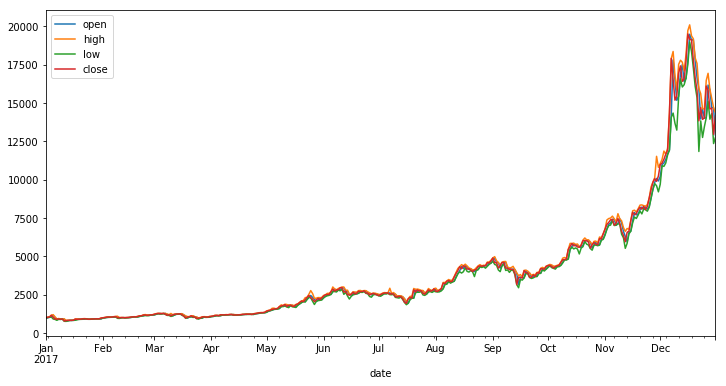

In [18]:
start_17 = pd.to_datetime('2017-01-01')
end_17 = pd.to_datetime('2018-01-01')
Bitcoin_price17 = df[df['name']=='Bitcoin']
Bitcoin_price17 = Bitcoin_price17[pd.to_datetime(Bitcoin_price17['date']) >= start_17] # getting greater than 2017
Bitcoin_price17= Bitcoin_price17[pd.to_datetime(Bitcoin_price17['date']) < end_17] # getting less than 2018
Bitcoin_price17.set_index(pd.to_datetime(Bitcoin_price17['date']),inplace=True)
Bitcoin_price17[['open','high','low','close']].plot(figsize=(12,6))
plt.show()

In [38]:
Bitcoin_price17

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,Buy_Flag,is_duplicated
date,,,,,,,,,,,,,,,
2017-01-01,bitcoin,BTC,Bitcoin,1/1/17,1,963.66,1003.08,958.70,998.33,147775000,1.549120e+10,0.995265,44.38,0,True
2017-01-02,bitcoin,BTC,Bitcoin,1/2/17,1,998.62,1031.39,996.70,1021.75,222185000,1.605510e+10,0.990653,34.69,0,True
2017-01-03,bitcoin,BTC,Bitcoin,1/3/17,1,1021.60,1044.08,1021.60,1043.84,185168000,1.642660e+10,0.999770,22.48,0,True
2017-01-04,bitcoin,BTC,Bitcoin,1/4/17,1,1044.40,1159.42,1044.40,1154.73,344946000,1.679540e+10,0.995955,115.02,0,True
2017-01-05,bitcoin,BTC,Bitcoin,1/5/17,1,1156.73,1191.10,910.42,1013.38,510199000,1.860400e+10,0.850793,280.68,0,True
2017-01-06,bitcoin,BTC,Bitcoin,1/6/17,1,1014.24,1046.81,883.94,902.20,351876000,1.631410e+10,0.861856,162.87,0,True
2017-01-07,bitcoin,BTC,Bitcoin,1/7/17,1,903.49,908.59,823.56,908.59,279550000,1.453440e+10,1.000000,85.03,0,True
2017-01-08,bitcoin,BTC,Bitcoin,1/8/17,1,908.17,942.72,887.25,911.20,158715000,1.461140e+10,0.966565,55.47,0,True
2017-01-09,bitcoin,BTC,Bitcoin,1/9/17,1,913.24,913.69,879.81,902.83,141877000,1.469490e+10,0.988114,33.88,0,True


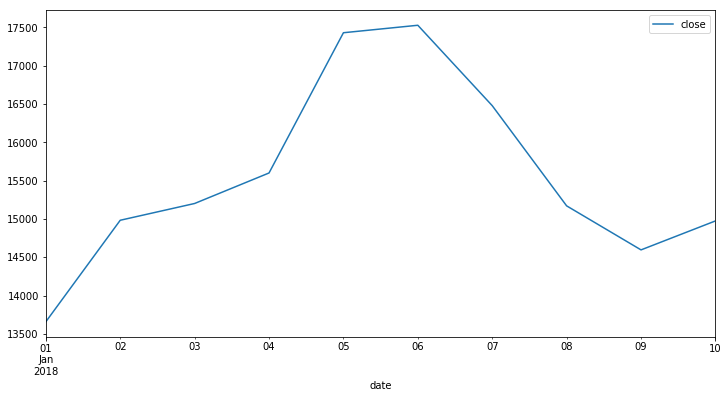

In [39]:
start_18 = pd.to_datetime('2018-01-01')
end_18 = pd.to_datetime('2019-01-01')
Bitcoin_price18 = df[df['name']=='Bitcoin']
Bitcoin_price18 = Bitcoin_price18[pd.to_datetime(Bitcoin_price18['date']) >= start_18] # getting greater than 2018
Bitcoin_price18= Bitcoin_price18[pd.to_datetime(Bitcoin_price18['date']) < end_18] # getting less than 2019
Bitcoin_price18.set_index(pd.to_datetime(Bitcoin_price18['date']),inplace=True)
Bitcoin_price18[['close']].plot(figsize=(12,6))
plt.show()

In [40]:
Bitcoin_price18

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,Buy_Flag,is_duplicated
date,,,,,,,,,,,,,,,
2018-01-01,bitcoin,BTC,Bitcoin,1/1/18,1,14112.2,14112.2,13154.7,13657.2,10291200000,2.367250e+11,0.967758,957.5,0,True
2018-01-02,bitcoin,BTC,Bitcoin,1/2/18,1,13625.0,15444.6,13163.6,14982.1,16846600000,2.285790e+11,0.970054,2281.0,0,True
2018-01-03,bitcoin,BTC,Bitcoin,1/3/18,1,14978.2,15572.8,14844.5,15201.0,16871900000,2.513120e+11,0.976125,728.3,0,True
2018-01-04,bitcoin,BTC,Bitcoin,1/4/18,1,15270.7,15739.7,14522.2,15599.2,21783200000,2.562500e+11,0.991074,1217.5,0,True
2018-01-05,bitcoin,BTC,Bitcoin,1/5/18,1,15477.2,17705.2,15202.8,17429.5,23840900000,2.597480e+11,0.984428,2502.4,0,True
2018-01-06,bitcoin,BTC,Bitcoin,1/6/18,1,17462.1,17712.4,16764.6,17527.0,18314600000,2.930910e+11,0.989533,947.8,0,True
2018-01-07,bitcoin,BTC,Bitcoin,1/7/18,1,17527.3,17579.6,16087.7,16477.6,15866000000,2.942220e+11,0.937314,1491.9,0,True
2018-01-08,bitcoin,BTC,Bitcoin,1/8/18,1,16476.2,16537.9,14208.2,15170.1,18413900000,2.766120e+11,0.917293,2329.7,0,True
2018-01-09,bitcoin,BTC,Bitcoin,1/9/18,1,15123.7,15497.5,14424.0,14595.4,16660000000,2.539350e+11,0.941791,1073.5,0,True


#### We reviewed top 10 crypto curriencies rank, which indicated that Bitcoin, Ethereum and Ripple were the top 3, respectively.

In [19]:
df[df['ranknow'] <= 10].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2         [Ethereum]
3           [Ripple]
4     [Bitcoin Cash]
5          [Cardano]
6         [Litecoin]
7              [NEM]
8             [IOTA]
9          [Stellar]
10            [Dash]
Name: name, dtype: object

In [20]:
# Let's find out more about the top 10 coins...
Bitcoin = df[df['name']=='Bitcoin']
Ethereum = df[df['name']=='Ethereum']
Ripple = df[df['name']=='Ripple']
Bitcoin_cash = df[df['name']=='Bitcoin Cash']
Cardano = df[df['name']=='Cardano']
Litecoin = df[df['name']=='Litecoin']
NEM = df[df['name']=='NEM']
IOTA = df[df['name']=='IOTA']
Stellar = df[df['name']=='Stellar']
Dash = df[df['name']=='Dash']
#Setting index date all dataframe
Bitcoin.set_index(pd.to_datetime(Bitcoin['date']),inplace=True)
Ethereum.set_index(pd.to_datetime(Ethereum['date']),inplace=True)
Ripple.set_index(pd.to_datetime(Ripple['date']),inplace=True)
Bitcoin_cash.set_index(pd.to_datetime(Bitcoin_cash['date']),inplace=True)
Cardano.set_index(pd.to_datetime(Cardano['date']),inplace=True)
Litecoin.set_index(pd.to_datetime(Litecoin['date']),inplace=True)
NEM.set_index(pd.to_datetime(NEM['date']),inplace=True)
IOTA.set_index(pd.to_datetime(IOTA['date']),inplace=True)
Stellar.set_index(pd.to_datetime(Stellar['date']),inplace=True)
Dash.set_index(pd.to_datetime(Dash['date']),inplace=True)

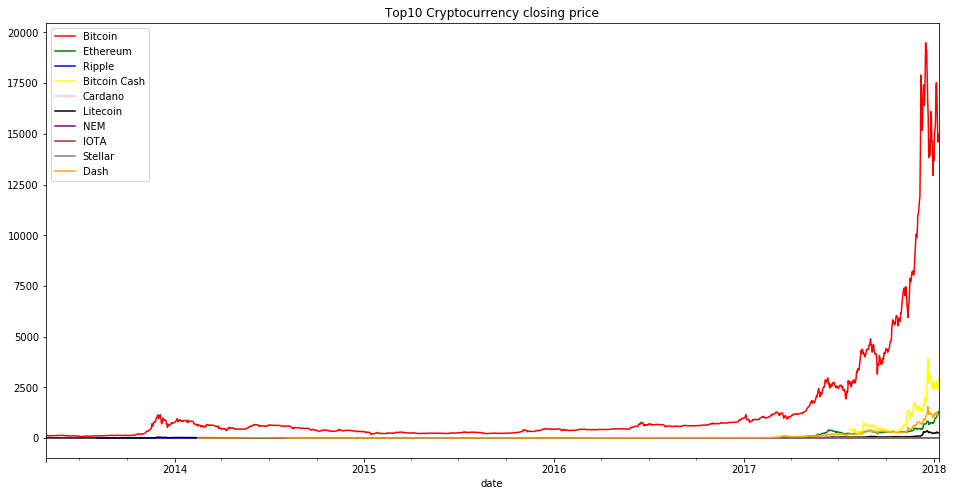

In [21]:
# Let's analyze the trend for closing price
plt.figure(figsize=(16,8))
(Bitcoin['close']).plot(color='red', label='Bitcoin')
(Ethereum['close']).plot(color='green', label='Ethereum')
(Ripple['close']).plot(color='blue', label='Ripple')
(Bitcoin_cash['close']).plot(color='yellow', label='Bitcoin Cash')
(Cardano['close']).plot(color='pink', label='Cardano')
(Litecoin['close']).plot(color='black', label='Litecoin')
(NEM['close']).plot(color='purple', label='NEM')
(IOTA['close']).plot(color='brown', label='IOTA')
(Stellar['close']).plot(color='grey', label='Stellar')
(Dash['close']).plot(color='orange', label='Dash')
plt.legend()
plt.title('Top10 Cryptocurrency closing price')
plt.show()

#### Reviewing the Market Capitalization for the top 10 Crypto tokens, we see that the "rank" is commensurate with the market cap valuations (outstanding coins x closing coin price).  Bitcoin has a Market Cap of 245 Billion USD!

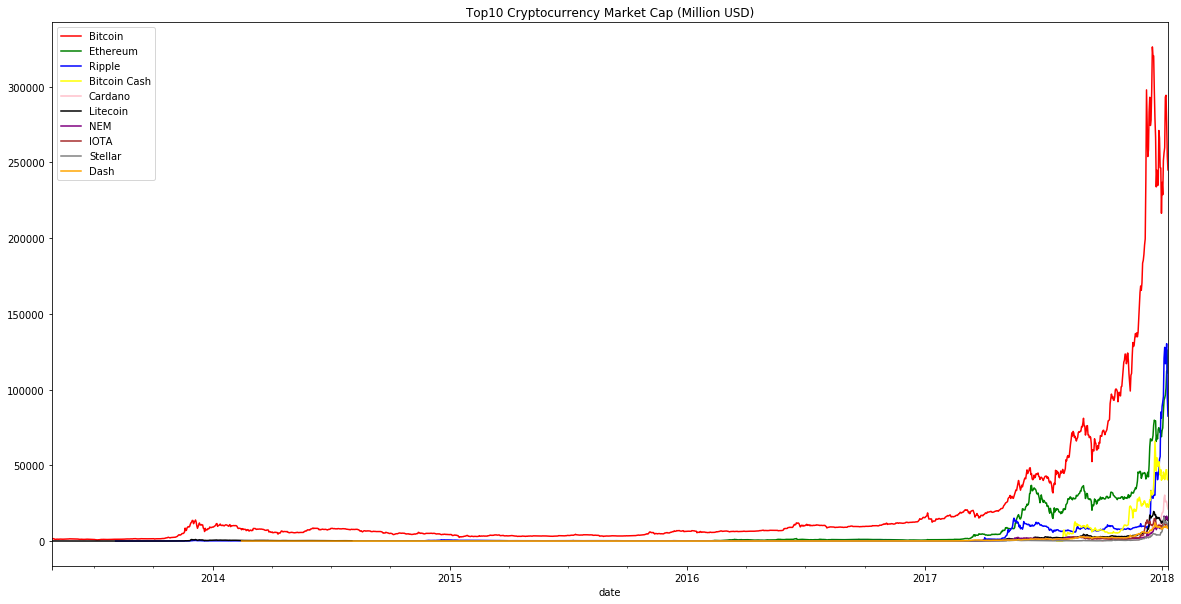

In [22]:
# draw pic of MarketCap
plt.figure(figsize=(20,10))
(Bitcoin['market']/1000000).plot(color='red', label='Bitcoin')
(Ethereum['market']/1000000).plot(color='green', label='Ethereum')
(Ripple['market']/1000000).plot(color='blue', label='Ripple')
(Bitcoin_cash['market']/1000000).plot(color='yellow', label='Bitcoin Cash')
(Cardano['market']/1000000).plot(color='pink', label='Cardano')
(Litecoin['market']/1000000).plot(color='black', label='Litecoin')
(NEM['market']/1000000).plot(color='purple', label='NEM')
(IOTA['market']/1000000).plot(color='brown', label='IOTA')
(Stellar['market']/1000000).plot(color='grey', label='Stellar')
(Dash['market']/1000000).plot(color='orange', label='Dash')
plt.legend()
plt.title('Top10 Cryptocurrency Market Cap (Million USD)')
#Bitcoin.set_index(['date'],inplace=True)
plt.show()

#### PCA and Dimensionality Reduction

#### - Exploratory Visualization 

#### We will perform our PCA using only the currency prices, close ratio and spread, as other variables were unrelated to performance 

In [23]:
features = ['open', 'high', 'low', 'close', 'close_ratio', 'spread']

##### The next two lines of code separate the training set from the test set

In [24]:
x = df.loc[:, features].values

In [25]:
y = df.loc[:,['Buy_Flag']].values

##### The next lines of code standardize the features and run the PCA 

In [26]:
x = StandardScaler().fit_transform(x)

In [27]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [28]:
finalDf = pd.concat([principalDf, df[['Buy_Flag']]], axis = 1)

#### Visualizing the results of the PCA shows a pretty clear delineation of Buy (0) vs Do Not Buy (1) tokens, using two Principal Components.

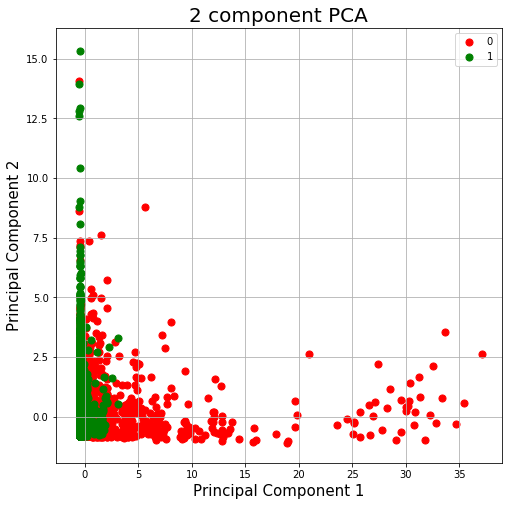

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for Buy_Flag, color in zip(targets,colors):
    indicesToKeep = finalDf['Buy_Flag'] == Buy_Flag
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components. The first principal component contains 79.5% of the variance and the second principal component contains 16.8% of the variance. Together, the two components contain 96.3% of the information we need to determine Buy vs Do Not Buy!!! 

In [31]:
pca.explained_variance_ratio_

array([ 0.79477393,  0.16770748])

#### Lastly, a review of the final Principal Components Data Frame 

In [32]:
finalDf

,principal component 1,principal component 2,Buy_Flag
0,-0.232995,-0.526973,0
1,-0.196938,-0.379668,0
2,-0.200383,0.310361,0
3,-0.177611,2.552808,0
4,-0.198930,2.526736,0
5,-0.224066,1.176476,0
6,-0.225971,-0.337014,0
7,-0.243456,-0.291342,0
8,-0.229848,1.233071,0
9,-0.238659,-0.435471,0


### Other Features That Could Be Added

#### The world of Crypto Currency is fairly new.  There have been many Crypto-millionaires made simply by being an early adopter of the technology, investing in virtually unproven currencies on unproven trading platforms.  The anonymity around Crypto Currencies and blockchain technology -- while the cornerstone of Cryptos -- is also the biggest threat to the future of Cryptos.  Legislation and goverment intervention has recently adversely impacted performance of Cryptos, so it would be interesting to layer-in data regarding timing of key legislation and news, to determine the impact on the prices of Crypto currencies.  For instance, South Korea has recently banned trading of Cryptos, while other countries are forcing trading platforms to identify users in order to levy taxes in gains.  It would also be interesting to explore the relationship bewtween "mining fees" and the price of cryptos.  A journalist attempted to withdraw a Bitcoin from a Bitcoin ATM machine in Las Vegas, only to lose his money due to the fact that the mining fee exceeded the value of his transaction.  Finally, it would be interesting to compare the Crypto market performance to the Dow, S&P 500 and NYSE indices, to see if a correlation exists.